# Introduction

As an aspiring data analyst, I was curious about the job market while preparing for my career and job search. To answer some of the questions that I had in mind, I decided to conduct data analysis on my own. I worked on the [DataAnalyst](http://www.kaggle.com/andrewmvd/data-analyst-jobs) dataset created by [Larxel](https://www.kaggle.com/andrewmvd) that was scraped from Glassdoor and focused mainly on data that are related to my questions. Hopefully, this analysis would be helpful for those who are looking for data analyst positions as well. 

**Questions to be Answered**

*  What industries are looking for data analysts and what are the salary differences?

*  Where do most data analyst jobs locate in and what are the salary differences?

*  What are the skills that most companies are looking for from applicants?
    *  What skills are different job seniorities looking for?
    *  What skills are different industries looking for?
  
    
*  How are the salaries across different position levels?

**Project Outline**
1. [Data Preparation](#1)
      - [Loading Data & Data Observation](#4)
      - [Data Cleaning & Wrangling](#5)
      
      
2. [Exploratory Data Analysis & Data Visualizations](#2)

3. [Conclusions & Insights](#3)

# 1. Data Preparation <a id="1"></a>


#### Importing Packages

In [293]:
# For data processing
import pandas as pd
import numpy as np
import math
from statsmodels.stats.weightstats import ztest
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 30)
pd.options.mode.chained_assignment = None

# For data vis
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'darkgrid')

import warnings
warnings.filterwarnings('ignore')

#### Loading Data & Data Observation <a id="4"></a>

In [261]:
df = pd.read_csv('DataAnalyst.csv', index_col = 0)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [262]:
df.shape

(2253, 15)

In [263]:
df.nunique()

Job Title            1272
Salary Estimate        90
Job Description      2253
Rating                 37
Company Name         1513
Location              253
Headquarters          483
Size                    9
Founded               161
Type of ownership      15
Industry               89
Sector                 25
Revenue                14
Competitors           291
Easy Apply              2
dtype: int64

#### Data Cleaning & Wrangling <a id="5"></a>
After observing the dataset, I found that it would be helpful to perform these tasks during the wrangling phase:
- Parse minimum and maximum from salary estimate to calculate avarage salary
- Parse state abbreviations from the Location column
- Parse certain texts related to skills from the job descriptions
- Parse job seniority from job titles
- Drop unwanted columns and do some data cleaning

In [264]:
# Counting missing values showing -1 
(df == '-1').sum()

Job Title               0
Salary Estimate         1
Job Description         0
Rating                  0
Company Name            0
Location                0
Headquarters          172
Size                  163
Founded                 0
Type of ownership     163
Industry              353
Sector                353
Revenue               163
Competitors          1732
Easy Apply           2173
dtype: int64

In [265]:
# Removing row with value of -1 from Salary Estimate
df = df[df['Salary Estimate'] != '-1']
(df['Salary Estimate'] == '-1').sum()

0

In [266]:
# Removing parentheses from Salary Estimate
salary = df['Salary Estimate'].apply(lambda x : x.split('(')[0])

# Removing K and dollar sign from Salary Estimate
rm_kd = salary.apply(lambda x : x.replace('K','').replace('$',''))
rm_kd 

0        37-66 
1        37-66 
2        37-66 
3        37-66 
4        37-66 
         ...   
2248    78-104 
2249    78-104 
2250    78-104 
2251    78-104 
2252    78-104 
Name: Salary Estimate, Length: 2252, dtype: object

In [267]:
# Creating columns for minimum, maximum, and average salary
df['min_salary'] = rm_kd.apply(lambda x : int(x.split('-')[0]))
df['max_salary'] = rm_kd.apply(lambda x : int(x.split('-')[1]))
df['avg_salary'] = (df.min_salary + df.max_salary) / 2
df.sample(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,min_salary,max_salary,avg_salary
131,Data Processing & Performance Analyst,$59K-$85K (Glassdoor est.),The Brink’s name is a promise to respect the t...,3.1,Balance Innovations\n3.1,"New York, NY","Lenexa, KS",51 to 200 employees,-1,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),-1,-1,59,85,72.0
595,Epidemiologist Data Analyst-Urology,$57K-$103K (Glassdoor est.),Overview\n\nYou can find the cures you know ar...,4.0,UCLA Health\n4.0,"Los Angeles, CA","Los Angeles, CA",5001 to 10000 employees,1919,Company - Public,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,"Cedars-Sinai Medical Center, Loma Linda Univer...",-1,57,103,80.0


In [268]:
# Getting state abbreviations from "Location"
df['job_state'] = df['Location'].apply(lambda x : x.split(',')[1])
df['job_state'].unique()

array([' NY', ' NJ', ' UT', ' CA', ' VA', ' FL', ' IL', ' TX', ' AZ',
       ' PA', ' DE', ' OH', ' NC', ' SC', ' IN', ' WA', ' GA', ' KS',
       ' CO', ' Arapahoe'], dtype=object)

In [269]:
# Replacing "Arapahoe" from job_state with "CO"
df['job_state'] = df['job_state'].replace('Arapahoe', 'CO', regex=True)
df['job_state'].unique()

array([' NY', ' NJ', ' UT', ' CA', ' VA', ' FL', ' IL', ' TX', ' AZ',
       ' PA', ' DE', ' OH', ' NC', ' SC', ' IN', ' WA', ' GA', ' KS',
       ' CO'], dtype=object)

In [270]:
# Parsing Skills from Job Descriptions
df['Python'] = df['Job Description'].apply(lambda x : 1 if 'python' in x.lower() else 0)
df['R'] = df['Job Description'].apply(lambda x : 1 if 'R ' in x else 0)
df['SAS'] = df['Job Description'].apply(lambda x : 1 if 'SAS' in x else 0)
df['SQL'] = df['Job Description'].apply(lambda x : 1 if 'sql' in x.lower() else 0)
df['Java'] = df['Job Description'].apply(lambda x : 1 if 'java' in x.lower() else 0)
df['AWS'] = df['Job Description'].apply(lambda x : 1 if 'aws' in x.lower() else 0)
df['SPSS'] = df['Job Description'].apply(lambda x : 1 if 'spss' in x.lower() else 0)
df['Excel'] = df['Job Description'].apply(lambda x : 1 if 'excel' in x.lower() else 0)
df['Tableau'] = df['Job Description'].apply(lambda x : 1 if 'tableau' in x.lower() else 0)
df['PowerBI'] = df['Job Description'].apply(lambda x : 1 if 'powerbi' in x.lower() or 'power bi' in x.lower() else 0)
df['Hadoop'] = df['Job Description'].apply(lambda x : 1 if 'hadoop' in x.lower() else 0)
df['Spark'] = df['Job Description'].apply(lambda x : 1 if 'spark' in x.lower() else 0)
df['Machine Learning'] = df['Job Description'].apply(lambda x : 1 if 'machine learning' in x.lower() or 'ML' in x else 0)
df['Statistics'] = df['Job Description'].apply(lambda x : 1 if 'statistics' in x.lower() or 'stats' in x.lower() or 'statistical' in x.lower() else 0)
df['A/B Testing'] = df['Job Description'].apply(lambda x : 1 if 'a/b testing' in x.lower() else 0)

df[['Python','R','SAS','SQL','Java','AWS','SPSS','Excel','Tableau','PowerBI',
    'Hadoop','Spark','Machine Learning','Statistics','A/B Testing']].sample(3)

,Python,R,SAS,SQL,Java,AWS,SPSS,Excel,Tableau,PowerBI,Hadoop,Spark,Machine Learning,Statistics,A/B Testing
1884,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
474,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
1379,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0


In [271]:
# Parsing Job Seniority from Job Titles
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'Senior'
    elif 'jr' in title.lower() or 'jr' in title.lower() or 'junior' in title.lower() or 'entry' in title.lower():
        return 'Junior'
    elif 'intern' in title.lower() or 'internship' in title.lower() or 'temp' in title.lower():
        return 'Intern'
    else:
        return 'General'

df['job_seniority'] = df['Job Title'].apply(seniority)
df['job_seniority'].value_counts()

General    1668
Senior      481
Junior       86
Intern       17
Name: job_seniority, dtype: int64

In [272]:
# Removing strings after '\n' from Company Name
df['Company Name'] = df["Company Name"].apply(lambda x: str(x)[:-4])
df.sample(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,...,R,SAS,SQL,Java,AWS,SPSS,Excel,Tableau,PowerBI,Hadoop,Spark,Machine Learning,Statistics,A/B Testing,job_seniority
412,SAP Data Analyst,$48K-$96K (Glassdoor est.),The SAP Data Analyst verifies and enters all C...,3.9,Sharp Electronics Corporation,"Montvale, NJ","Montvale, NJ",1001 to 5000 employees,1962,Company - Public,IT Services,Information Technology,$1 to $2 billion (USD),-1,-1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,General
808,Data Services Business Analyst 2,$42K-$76K (Glassdoor est.),As a Business Analyst working within the Data ...,3.6,Willis Towers Watson,"Chicago, IL","London, United Kingdom",10000+ employees,1828,Company - Public,Consulting,Business Services,$10+ billion (USD),"Aon, Accenture, Marsh & McLennan Companies",-1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,General


In [273]:
# Dropping unwanted columns
df = df.drop(['Salary Estimate','Headquarters', 'Size','Revenue','Easy Apply','Founded','Competitors'], axis = 1)
df.sample(2)

,Job Title,Job Description,Rating,Company Name,Location,Type of ownership,Industry,Sector,min_salary,max_salary,avg_salary,job_state,Python,R,SAS,SQL,Java,AWS,SPSS,Excel,Tableau,PowerBI,Hadoop,Spark,Machine Learning,Statistics,A/B Testing,job_seniority
2028,Epic Clarity Data Analyst,Title: EPIC Clarity Data Analyst\nLocation: 74...,4.1,APN Software Services Inc.,"Oakland, CA",Company - Private,Computer Hardware & Software,Information Technology,46,86,66.0,CA,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,General
1052,"Junior Data Analyst-Phoenix, AZ","Junior Data Analyst\nLocation: Phoenix, AZ\nDu...",5.0,Georgia IT Inc.,"Phoenix, AZ",Company - Private,-1,-1,43,94,68.5,AZ,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,Junior


# 2. Data Analysis & Visualizations <a id="2"></a>

In [274]:
df.describe()

,Rating,min_salary,max_salary,avg_salary,Python,R,SAS,SQL,Java,AWS,SPSS,Excel,Tableau,PowerBI,Hadoop,Spark,Machine Learning,Statistics,A/B Testing
count,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000
mean,3.160080,54.266874,89.979130,72.123002,0.282860,0.177620,0.159414,0.616341,0.090586,0.122114,0.068384,0.600799,0.275311,0.110124,0.060391,0.039520,0.145648,0.374778,0.009769
std,1.665393,19.575375,29.315605,23.600734,0.450489,0.382277,0.366143,0.486384,0.287083,0.327490,0.252459,0.489843,0.446770,0.313114,0.238262,0.194873,0.352832,0.484173,0.098377
min,-1.000000,24.000000,38.000000,33.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100000,41.000000,70.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.600000,50.000000,87.000000,69.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,64.000000,104.000000,80.500000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.000000,113.000000,190.000000,150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Looking at the decriptive statistics, we could see that the mean for average salary is about 72K, while the median falls around 69K. Let's plot the average salary in a histogram to see if the distribution is skewed.

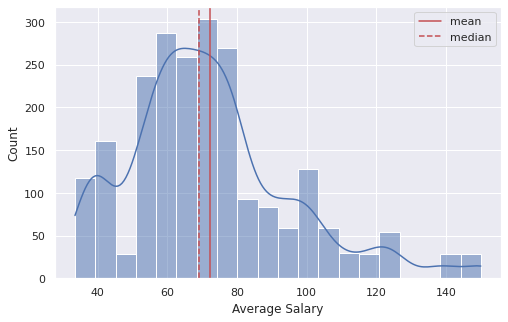

In [275]:
## Salary Distribution (Histogram)

plt.figure(figsize = (8,5))
ax = sns.histplot(x='avg_salary', data = df, bins = 20, kde = True)
ax.axvline(df['avg_salary'].mean(), color='r', linestyle='-', label = 'mean')
ax.axvline(df['avg_salary'].median(), color = 'r', linestyle='--', label = 'median')
plt.xlabel('Average Salary')
ax.legend()

plt.show()

As expected, the average salary distribution is slightly right-skewed with some outliers falling above 140K, causing the mean to be greater than the median. In this case, it would be better to refer to the median (69K) than to the mean.

### **What industries are looking for data analysts and what are the salary differences?**
To start off, I created a dual-axis bar chart to get an overall idea of what are the top industries that are in demand for data analysts, as well as compare their average salaries. 

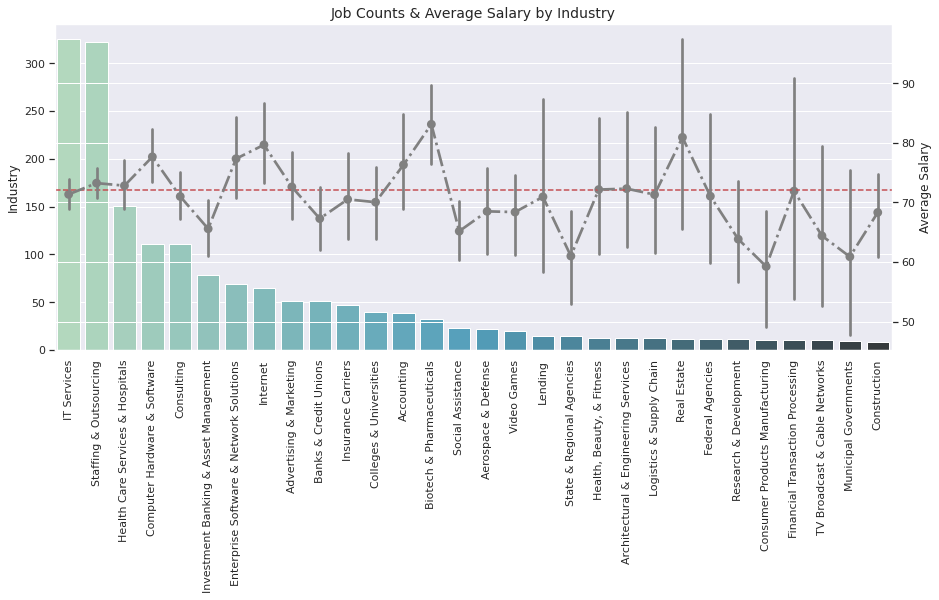

In [276]:
## Job Counts & Average Salary by Industry

def barPoint(col, num):
    
    # plotting the bars for job counts
    df_p = df[df[col] != '-1']
    plt.figure(figsize=(15, 6))
    count = df_p[col].value_counts().head(num)
    ax = sns.barplot(x = count.index, y = count, palette = 'GnBu_d')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    
    # plotting the points for average salary
    ax2 = ax.twinx()
    ax2.axhline(df['avg_salary'].mean(), color='r', linestyle='--', label = 'mean')
    sns.pointplot(x = col, y = ('avg_salary'), data = df_p, ax = ax2, order = count.index, linestyles = '-.', color = 'gray')
    plt.ylabel('Average Salary')
    plt.title('Job Counts & Average Salary by ' + col, fontsize = 14)
    
    plt.show()
    
    
barPoint('Industry', 30) # display top 30 industries

As we can see from the graph above, industries like IT and Business Services are looking for the most data analysts, with provided salaries falling in around 70-75K. On the other hand, industries such as Biotech and Real Estate have relatively lower demands for data analysts on Glassdoor but are willing to pay higher amounts (80-85k).  
  
Now that we've seen the industries that are more interested in looking for data analysts and how their salaries generally look like, let's take a closer look at the salary range for those industries:

In [277]:
top_30 = df['Industry'].value_counts()[1:31].index
top_30_df = df[df['Industry'].isin(top_30)]
top_30_df['Industry'].nunique()

30

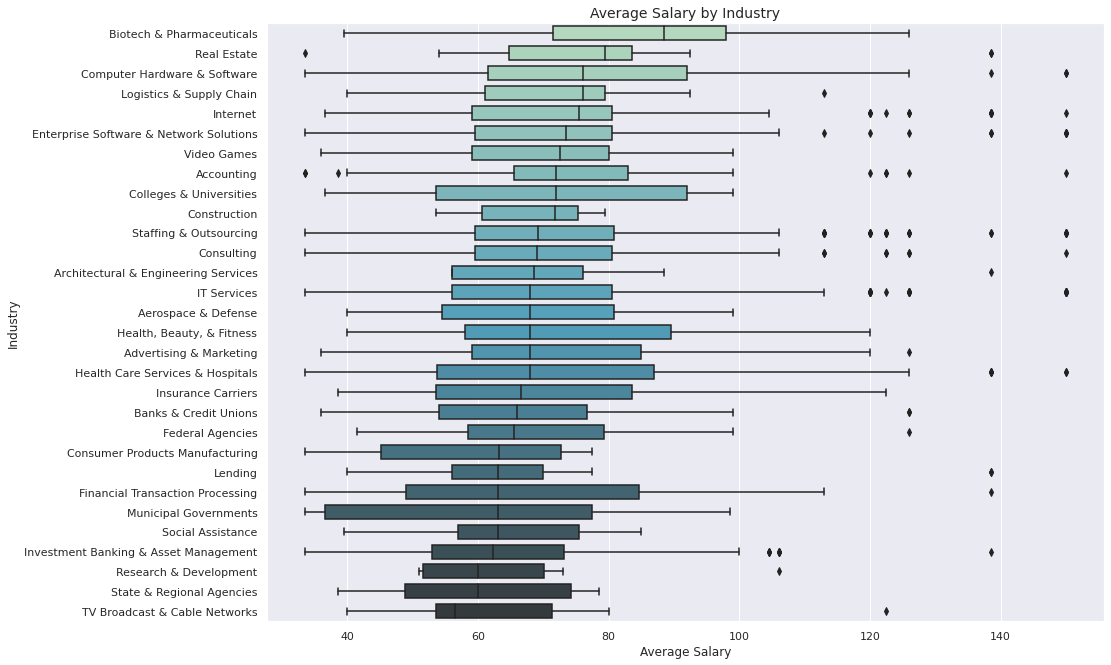

In [278]:
## Average Salary by Industry (Boxplot)

def boxplot(data, col, figsize):

    plt.figure(figsize = figsize)
    sort_avgslry = data.groupby(col).median().sort_values(by = 'avg_salary', ascending = False).index
    sns.boxplot(x = 'avg_salary', y = col, data = data, order = sort_avgslry, width = 0.7, palette = 'GnBu_d')
    plt.xlabel('Average Salary')
    plt.title('Average Salary by '+ col, fontsize = 14)

    plt.show()
    
boxplot(top_30_df, 'Industry', (15,11))

From the first boxplot above, we could see that Education Training Services and Health Care Products Manufacturing are both industries with the highest medians of average salary. Their salaries are higher than the Biotech industry, yet from the previous job count graphs, we know that not many data analyst job opportunities from these industries could be found on Glassdoor. We could also see that, although the IT Service industry had the highest demand for data analysts, it did not end up in the list of top 30 industries with the highest Data Analyst salaries.  
  
Therefore, before comparing their salaries, let's check their difference in sample size:

In [279]:
def get_job_count(industries):
    count = []
    for i in industries:
        count.append(df[df['Industry'] == i].shape[0])
    print (count)
    
get_job_count(['Biotech & Pharmaceuticals','Real Estate','Computer Hardware & Software'])
get_job_count(['IT Services','Staffing & Outsourcing','Health Care Services & Hospitals'])

[33, 12, 111]
[325, 322, 151]


Though the the Biotech industry and the Real Estate industry had the highest average salaries, there were only few relevant entries in this dataset, which is a huge difference in size in comparison with the IT Services industry. Let's create a histogram to see if they're normally distributed and conduct a simple z-test to see if there's really a significant differnece in their salary: 

Text(0.5, 1.0, 'IT Services')

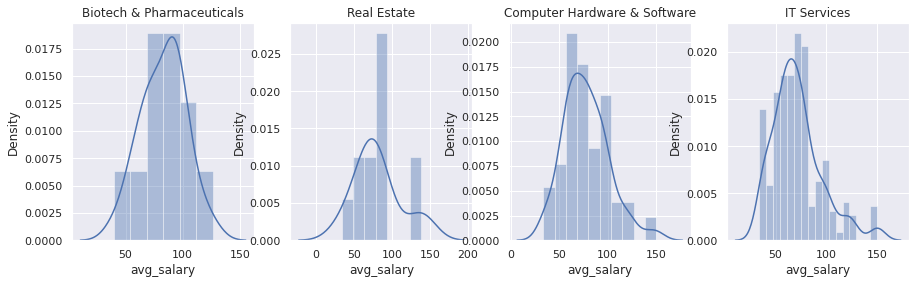

In [280]:
## Checking if their salaries are normally distributed
Bio = df[df['Industry']=='Biotech & Pharmaceuticals']['avg_salary']
Real = df[df['Industry']=='Real Estate']['avg_salary']
Comp = df[df['Industry']=='Computer Hardware & Software']['avg_salary']
IT = df[df['Industry']=='IT Services']['avg_salary']

fig, axs = plt.subplots(1, 4, figsize=(15,4))
sns.distplot(Bio, kde = True, ax = axs[0]).set_title('Biotech & Pharmaceuticals')
sns.distplot(Real, kde = True, ax = axs[1]).set_title('Real Estate')
sns.distplot(Comp, kde = True, ax = axs[2]).set_title('Computer Hardware & Software')
sns.distplot(IT, kde = True, ax = axs[3]).set_title('IT Services')

In [281]:
z_test1, pval1 = ztest(x1 = Bio, x2 = IT)
z_test2, pval2 = ztest(x1 = Real, x2 = IT)
z_test3, pval3 = ztest(x1 = Comp, x2 = IT)
print(pval1,pval2,pval3)

0.0073445336488563995 0.18671656974736828 0.017548261287371896


It seems like the Biotech & Pharmaceuticals and the Computer Hardware & Software industry both have significantly different salaries compared to IT Services. However, the p-value for testing Real Estate and IT Services was greater than 0.05, which means that we couldn't reject the null hypothesis that the average salary for these two industries are the same. Despite that, we are now much more confident that the Biotech & Pharmaceuticals and Computer Hardware & Software industry have higher average salaries compared to the industry with the highest data analyst demand -- IT Services. 

### **Where do most data analyst jobs locate in and what are the salary differences?**  
This question is pretty similar with the previous one. Let's plot the location data using the same approach:

In [282]:
df['job_state'].nunique()

19

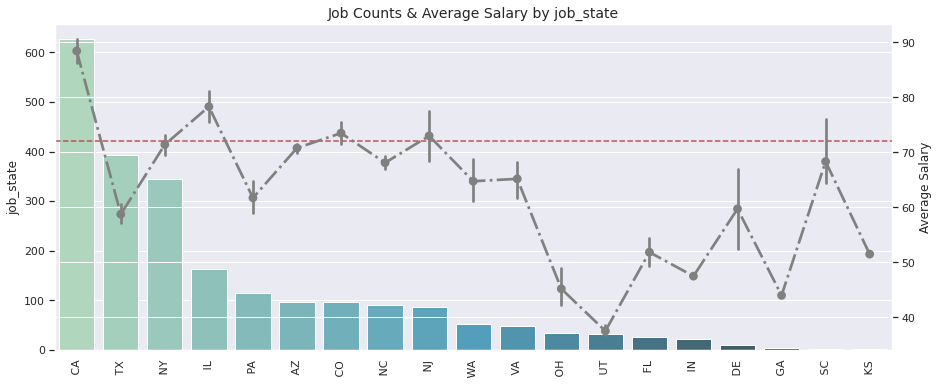

In [283]:
## Job Counts & Average Salary by State
barPoint('job_state',19)

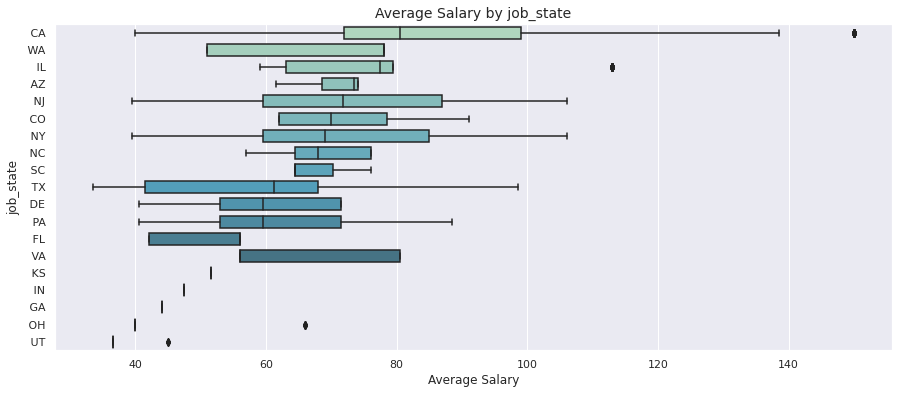

In [284]:
## Average Salary by State (Boxplot)
boxplot(df,'job_state',(15,6))

Here, we could summarize a few points:
* As shown in the bar chart above, California, Texas, and New York are the top three states that provided the highest number of data analyst jobs on Glassdoor. However, both Texas and New York have average salaries lower than the average salary of all locations.
* Though it seems like California, Illinios, and Colorado have the highest average data analyst salaries from the bar chart, the boxplot showed that California, Washington, and Illinois have the highest medium salaries. WA, IL, and CO are all missing whiskers in their boxplots, which means that they lack variability in their salaries. In this case, it would be safer to compare the mean of the average salaries.  

### **What are the skills that most companies are looking for from applicants?**  
Let's utilize the skills that we've parsed from the job description and create a simple bar chart showing how much each skill are required from companies:

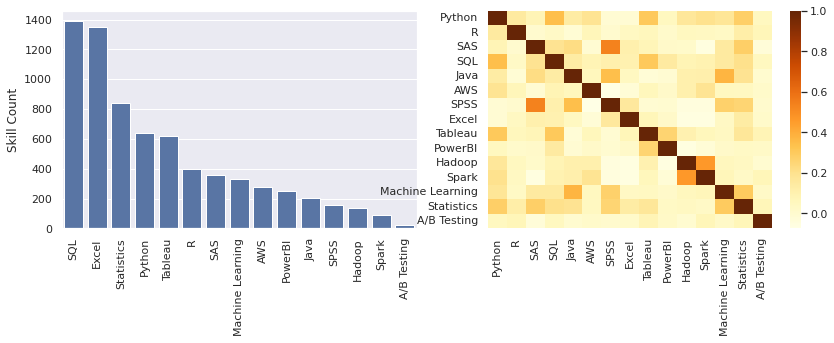

In [285]:
## Skill Counts Bar Chart & Correlation Heatmap
skills = ['Python','R','SAS','SQL','Java','AWS','SPSS','Excel','Tableau','PowerBI','Hadoop',
          'Spark','Machine Learning','Statistics','A/B Testing']

fig, axs = plt.subplots(1, 2, figsize=(14,4))
# barchart
sort_skills = df[skills].sum().sort_values(ascending = False)
sns.barplot(x = sort_skills.index, y = sort_skills, color = 'b', ax = axs[0])
axs[0].tick_params('x', labelrotation=90)
axs[0].set_ylabel('Skill Count')
# heatmap
correlation = df[skills].corr()
axs[1] = sns.heatmap(correlation, cmap="YlOrBr")

As shown from the bar chart above, SQL and Excel are the most mentioned skills from companies, followed by other skills such as statistics, Python and Tableau. Now let's break them down by job seniority to see if there are differences in skill requirements between seniorities:

In [286]:
skills_by_seniority_df = df[['job_seniority','Python','R','SAS','SQL','Java','AWS','SPSS','Excel',
                             'Tableau','PowerBI','Hadoop','Spark','Machine Learning','Statistics',
                             'A/B Testing']].groupby('job_seniority').sum().transpose()
skills_by_seniority_df

job_seniority,General,Intern,Junior,Senior
Python,436,4,7,190
R,297,1,8,94
SAS,246,1,46,66
SQL,999,4,61,324
Java,133,0,40,31
AWS,183,3,5,84
SPSS,107,0,39,8
Excel,1000,10,71,272
Tableau,411,2,10,197
PowerBI,178,0,5,65


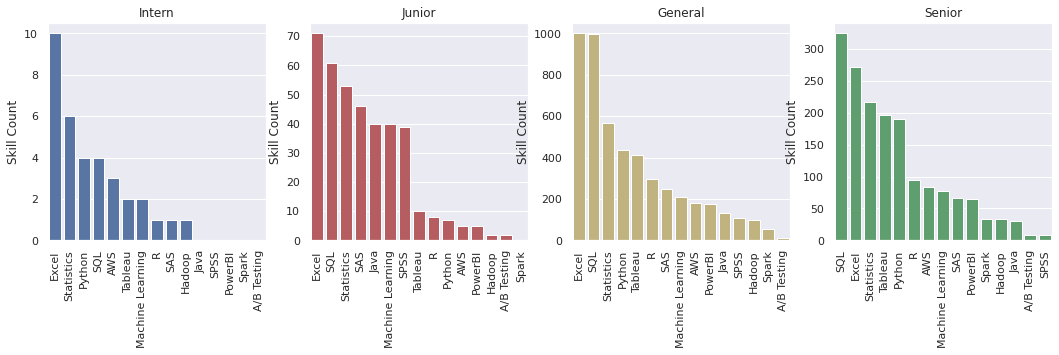

In [287]:
# Skill Counts for Different Job Seniorities
intern = skills_by_seniority_df['Intern'].sort_values(ascending = False)
jr = skills_by_seniority_df['Junior'].sort_values(ascending = False)
general = skills_by_seniority_df['General'].sort_values(ascending = False)
sr = skills_by_seniority_df['Senior'].sort_values(ascending = False)

fig, axs = plt.subplots(1, 4, figsize=(18,4))
sns.barplot(x = intern.index, y = intern, color = 'b' ,ax = axs[0]).set_title('Intern')
sns.barplot(x = jr.index, y = jr, color = 'r', ax = axs[1]).set_title('Junior')
sns.barplot(x = general.index, y = general, color = 'y', ax = axs[2]).set_title('General')
sns.barplot(x = sr.index, y = sr, color = 'g', ax = axs[3]).set_title('Senior')

for i in range(4):
    axs[i].tick_params('x', labelrotation=90)
    axs[i].set_ylabel('Skill Count')

As a result, Excel, SQL, and statistics still remained the top three most important skills after looking at different seniorities individually. Surprisingly, there was a considerable amount of companies that required junior positions to have SAS, Java, and machine learning skills, whereas senior and other general positions were more interested in applicants with Tableau and Python skills.  
  
Now, let's try to break the skill counts down by industry and see if there are any discrepancies:

In [288]:
top_6 = df['Industry'].value_counts()[1:7].index
top_6_df = df[df['Industry'].isin(top_6)]

skills_by_industry_df = top_6_df[top_6_df['Industry'] != '-1'][['Industry','Python','R','SAS','SQL','Java','AWS',
                        'SPSS','Excel','Tableau','PowerBI','Hadoop','Spark','Machine Learning','Statistics',
                        'A/B Testing']].groupby('Industry').sum().transpose()

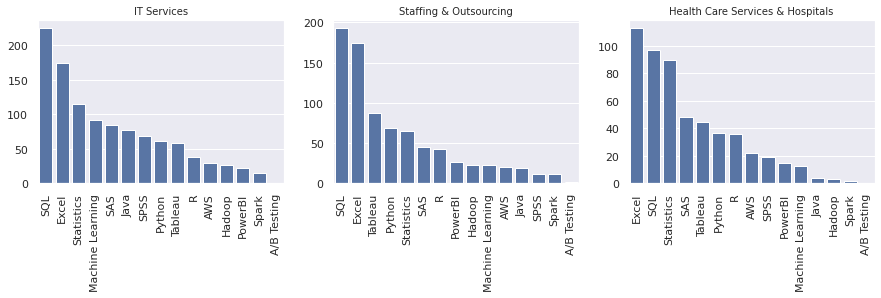

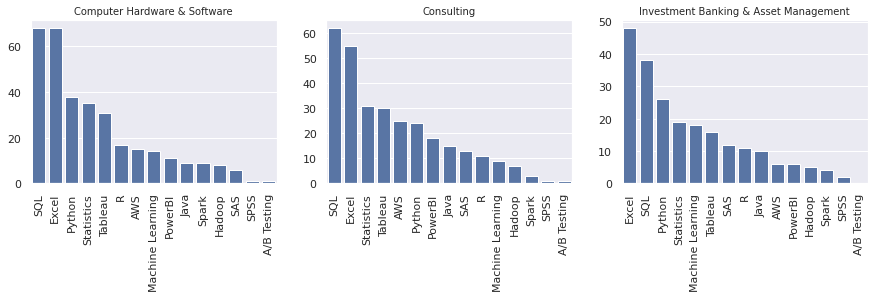

In [289]:
# Skill Counts for Different Job Seniorities
for i in range(2):
    fig, axs = plt.subplots(1, 3, figsize = (15,3))
    for k in range(3):
        industry = skills_by_industry_df[top_6[3*i+k]].sort_values(ascending = False)
        sns.barplot(x = industry.index, y = industry , color = 'b' ,ax = axs[k]).set_title(top_6[3*i+k], fontsize = 10)
        axs[k].tick_params('x', labelrotation = 90)
        axs[k].set_ylabel('')

From the pivoted bar charts above, we can summarize a few points:
* SQL and Excel are the two main skills that industries are looking for.
* It seems like SAS is a slighlty more preferred programming language (for data analysis) for the IT and Healthcare industry, whereas the other four industries preferred applicants with Python skills.
* Machine learning is a more prioritized skill by the IT industry compared to others. Tableau, on the other hand, is less prioritized by the IT industry and more valued by the Staffing and Consulting industry.  
  
Let's also do a quick calculation to see how many skills on average are the different industries expecting from applicants:

In [290]:
# Creating a column that stores the number of skills mentioned from each company
top_6_df['Required Skills Count'] = 0 
for i in skills:
    top_6_df['Required Skills Count'] += top_6_df[i]
top_6_df[['Industry','Required Skills Count']].groupby('Industry').mean().sort_values('Required Skills Count', ascending = False)

,Required Skills Count
Industry,
Health Care Services & Hospitals,3.602649
IT Services,3.356923
Computer Hardware & Software,2.981982
Investment Banking & Asset Management,2.833333
Consulting,2.747748
Staffing & Outsourcing,2.527950


### **How are the salaries across different position levels?**  
Let's create a summary table showing the relevant salary statistics for each position level:

In [291]:
mean = df.groupby('job_seniority').mean()['avg_salary']
median = df.groupby('job_seniority').median()['avg_salary']
std = df.groupby('job_seniority').std()['avg_salary']
count = df['job_seniority'].value_counts()
summary = pd.DataFrame({'Avg Salary Mean': mean, 'Avg Salary Median': median, 'Standard Deviation':std,'Job Counts':count})
summary

,Avg Salary Mean,Avg Salary Median,Standard Deviation,Job Counts
General,71.669365,68.5,24.147777,1668
Intern,82.970588,73.5,29.510311,17
Junior,64.802326,60.5,19.687751,86
Senior,74.621622,72.0,21.646119,481


We could tell that the sample size for interns is significantly lower than the others, which may be the reason why the mean and median of the average salary turned out to be higher than other job seniorities that were supposed to have higher salaries based on our experience. Therefore, in this case, it would be better to only compare the other three categories.  
Now let's plot the salaries by job seniority:

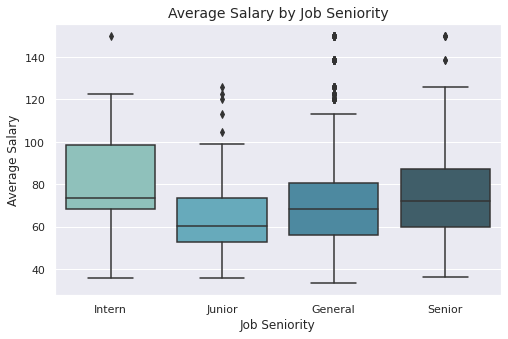

In [292]:
## Average Salary by Job Seniority (Boxplot)
plt.figure(figsize = (8,5))
sns.boxplot(x = 'job_seniority', y = 'avg_salary', data = df, order = ['Intern', 'Junior','General','Senior'], palette = 'GnBu_d')
plt.xlabel('Job Seniority')
plt.ylabel('Average Salary')
plt.title('Average Salary by Job Seniority', fontsize = 14)

plt.show()

As shown in the boxplot, all three position levels (junior, general, senior) have several outliers, which means that it would be fairer to compare the median of their average salaries. The median salary for junior, general, and senior levels are 60.5K, 68.5K, and 73.5K, respectively. Additionally, we could see from the boxplots that the average salary range increases as we move from junior positions to senior positions.

# 3. Conclusions & Insights <a id="3"></a>

**(1) What industries are looking for data analysts and what are the salary differences?**
* Industries such as IT Services, Staffing & Outsourcing, and Health Care Services & Hospitals are the industries that are looking for the most data analysts on Glassdoor.
* In terms of average salary, the Biotech & Pharmaceuticals (80-85K) and Computer Hardware & Software industry (75-80K) provide higher salaries on average for data analysts compared to the industries with higher data analyst demands (70-75K).

**(2) Where do most data analyst jobs locate in and what are the salary differences?**
* California, Texas, and New York are the top three states that provided the most data analyst opportunities on Glassdoor.
* Data analyst job positions in California provide the highest average salary as well (88K), whereas Texas (58K) and New York (71K) are below the average of all locations.

**(3) What are the skills that most companies are looking for from applicants?**
* SQL and Excel are the most mentioned skills across most companies and industries.
* Surprisingly, there was a considerable amount of companies that required junior positions to have SAS, Java, and machine learning skills, while senior and general position levels were more interested in applicants with Tableau and Python skills.
* SAS is slighlty more preferred analysis programming lanugage for the IT and Healthcare industry, whereas industries such as Staffing, Computer, Consulting, and Investment preferred applicants with Python skills.
* Machine learning is much more prioritized by the IT industry compared to others. Tableau, on the other hand, is less prioritized by the IT industry and more valued by the Staffing and Consulting industry.
  
**(4) What are the salary differences between entry-level and senior-level positions?**
* The median salary for junior, general, and senior levels are 60.5K, 68.5K, and 73.5K, respectively. 
* The average salary range increases when moving from junior positions to senior positions.